In [1]:
library(susieR)
library(curl)

Using libcurl 7.87.0 with OpenSSL/3.0.8



In [2]:
data("N3finemapping")

In [4]:
n = nrow(N3finemapping$X)
b = N3finemapping$true_coef[,1]

In [5]:
Rin = cor(N3finemapping$X)

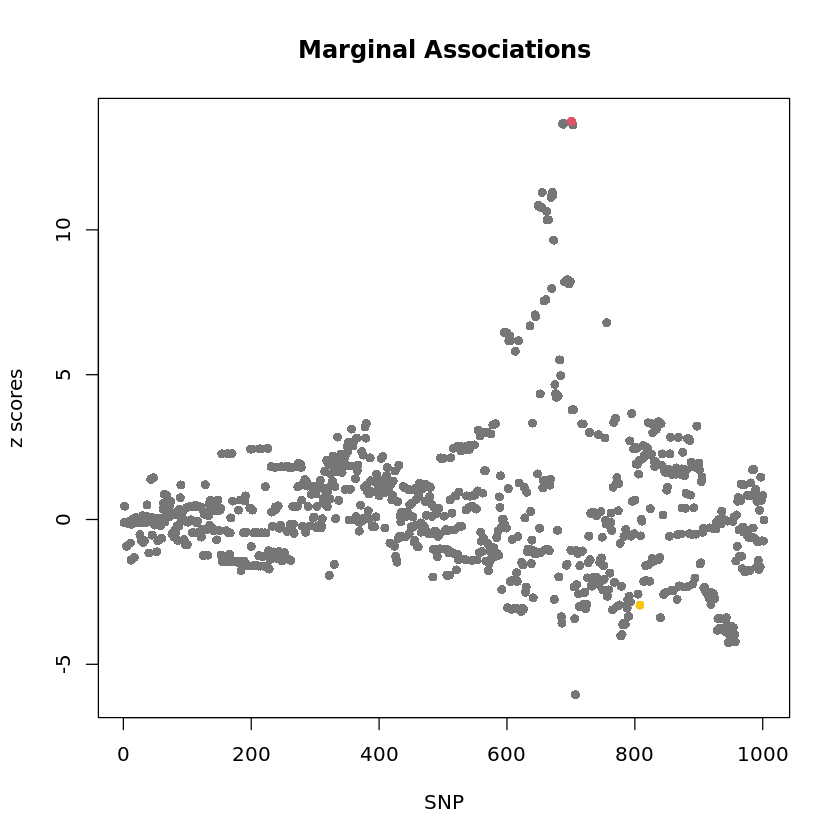

In [6]:
data_file <- tempfile(fileext = ".RData")
data_url <- paste0("https://raw.githubusercontent.com/stephenslab/susieR/",
                   "master/inst/datafiles/SummaryConsistency1k.RData")
curl_download(data_url,data_file)
load(data_file)
zflip = SummaryConsistency$z
ld = SummaryConsistency$ldref
n=10000
b = numeric(length(zflip))
b[SummaryConsistency$signal_id] = zflip[SummaryConsistency$signal_id]
plot(zflip, pch = 16, col = "#767676", main = "Marginal Associations", 
     xlab="SNP", ylab = "z scores")
points(SummaryConsistency$signal_id, zflip[SummaryConsistency$signal_id], col=2, pch=16)
points(SummaryConsistency$flip_id, zflip[SummaryConsistency$flip_id], col=7, pch=16)

In [49]:
Y

ERROR: Error in eval(expr, envir, enclos): object 'Y' not found


HINT: For large R or large XtX, consider installing the Rfast package for better performance.



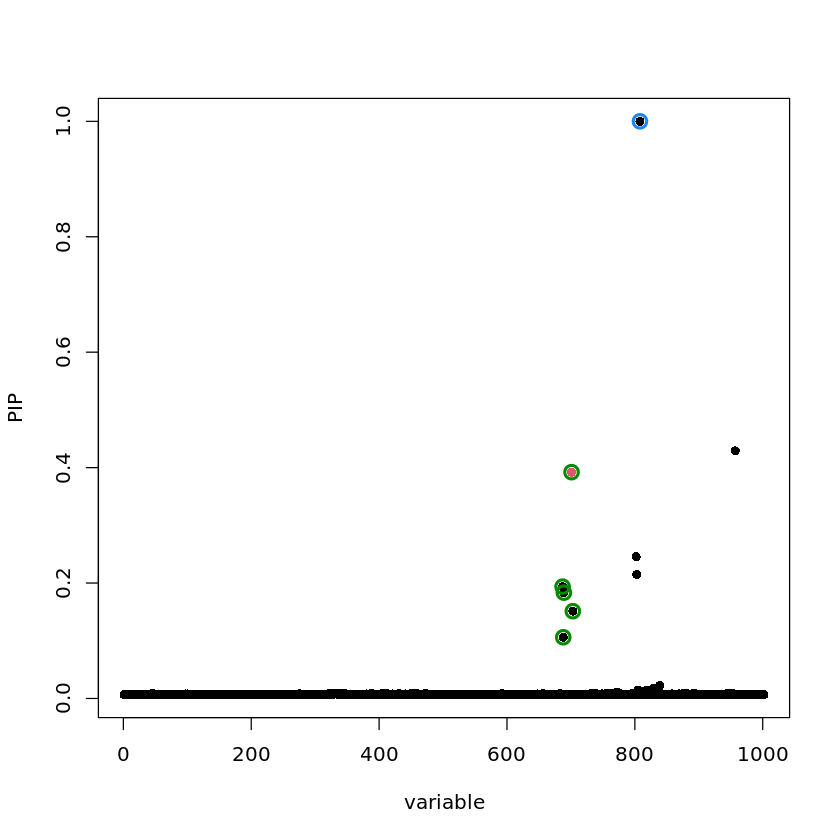

In [21]:
fit = susie_rss(zflip, ld, n=n)
susie_plot(fit, y='PIP', b=b)

In [48]:
typeof(n)

[1] "double"

In [30]:
results=data.frame(fit$pip)

In [11]:
data <- data.frame(x1 = c(NA, 2:10),                       # Create data frame
                   x2 = c(rep(5, 8), NA, NA),
                   x3 = c(4, NA, 1, 5, 6, 7, NA, 5, 9, 0))

In [12]:
data

x1,x2,x3
<int>,<dbl>,<dbl>
NA,5,4
2,5,NA
3,5,1
4,5,5
5,5,6
6,5,7
7,5,NA
8,5,5
9,NA,9


In [13]:
for(i in 1:ncol(data)) {                                   # Replace NA in all columns
  data[ , i][is.na(data[ , i])] <- mean(data[ , i], na.rm = TRUE)
}

In [14]:
data

x1,x2,x3
<dbl>,<dbl>,<dbl>
6,5,4.000
2,5,4.625
3,5,1.000
4,5,5.000
5,5,6.000
6,5,7.000
7,5,4.625
8,5,5.000
9,5,9.000
